In [1]:
import folium
import json
import geopandas as gpd
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

### 1.2 경기도 시·군·구별 청년 인구 비율 시각화

In [2]:
gdf = gpd.read_file("TL_SCCO_SIG.shp",encoding = 'utf-8')
gdf.drop(['SIG_KOR_NM'],axis = 1, inplace = True)

In [3]:
gdf = gdf.to_crs(epsg='4326')

In [4]:
gdf

,SIG_CD,SIG_ENG_NM,geometry
0,42110,Chuncheon-si,"POLYGON ((127.58509 38.08062, 127.58566 38.080..."
1,42130,Wonju-si,"POLYGON ((127.93580 37.50246, 127.93618 37.502..."
2,42150,Gangneung-si,"MULTIPOLYGON (((129.04785 37.64961, 129.04788 ..."
3,42170,Donghae-si,"MULTIPOLYGON (((129.08794 37.59500, 129.08789 ..."
4,42190,Taebaek-si,"POLYGON ((129.01252 37.33636, 129.01245 37.336..."
...,...,...,...
245,43745,Jeungpyeong-gun,"POLYGON ((127.53733 36.80859, 127.53797 36.808..."
246,43750,Jincheon-gun,"POLYGON ((127.44138 37.01190, 127.44193 37.011..."
247,43760,Goesan-gun,"POLYGON ((127.80067 36.94755, 127.80079 36.947..."
248,43770,Eumseong-gun,"POLYGON ((127.62988 37.15424, 127.62987 37.154..."


In [5]:
ggpr=pd.read_csv('경기도만인구비율.csv')
ggpr

,SIG_CD,SIG_KOR_NM,총 인구수,남 인구수,여 인구수,청년수,남자청년수,여자청년수,청년비율,남자청년비율,여자청년비율,남성대비여성비율,남성대비여성비율(청년)
0,41111,수원시 장안구,273661,137807,135854,76666,41122,35544,0.280150,0.298403,0.261634,0.985828,0.864355
1,41113,수원시 권선구,368645,186050,182595,112666,58801,53865,0.305622,0.316049,0.294997,0.981430,0.916056
2,41115,수원시 팔달구,174930,88180,86750,53679,28467,25212,0.306860,0.322828,0.290628,0.983783,0.885657
3,41117,수원시 영통구,368842,185039,183803,122181,62633,59548,0.331256,0.338485,0.323977,0.993320,0.950745
4,41131,성남시 수정구,241701,122204,119497,71206,37765,33441,0.294604,0.309032,0.279848,0.977849,0.885502
5,41133,성남시 중원구,216131,109444,106687,62375,32929,29446,0.288598,0.300875,0.276004,0.974809,0.894227
6,41135,성남시 분당구,482232,233759,248473,135705,66739,68966,0.281410,0.285503,0.277559,1.062945,1.033369
7,41150,의정부시,461710,227342,234368,124718,63520,61198,0.270122,0.279403,0.261119,1.030905,0.963445
8,41171,안양시만안구,239413,119864,119549,67456,35462,31994,0.281756,0.295852,0.267622,0.997372,0.902205
9,41173,안양시동안구,310614,152072,158542,86651,44148,42503,0.278967,0.290310,0.268087,1.042546,0.962739


In [6]:
#행정구역 코드인 SIG_CD를 KEY로 설정하여 Merge를 진행
gdf['SIG_CD']=gdf['SIG_CD'].astype(int)
Merge_data = pd.merge(left=gdf, right=ggpr, how='left', on=['SIG_CD'], sort=False)
Merge_data=Merge_data.dropna()
Merge_data

,SIG_CD,SIG_ENG_NM,geometry,SIG_KOR_NM,총 인구수,남 인구수,여 인구수,청년수,남자청년수,여자청년수,청년비율,남자청년비율,여자청년비율,남성대비여성비율,남성대비여성비율(청년)
18,41111,"Jangan-gu, Suwon-si","POLYGON ((127.01976 37.35104, 127.02008 37.350...",수원시 장안구,273661.0,137807.0,135854.0,76666.0,41122.0,35544.0,0.280150,0.298403,0.261634,0.985828,0.864355
19,41113,"Gwonseon-gu, Suwon-si","POLYGON ((127.03723 37.23684, 127.03679 37.236...",수원시 권선구,368645.0,186050.0,182595.0,112666.0,58801.0,53865.0,0.305622,0.316049,0.294997,0.981430,0.916056
20,41115,"Paldal-gu, Suwon-si","POLYGON ((127.03582 37.29361, 127.03644 37.293...",수원시 팔달구,174930.0,88180.0,86750.0,53679.0,28467.0,25212.0,0.306860,0.322828,0.290628,0.983783,0.885657
21,41117,"Yeongtong-gu, Suwon-si","POLYGON ((127.07484 37.26588, 127.07488 37.265...",수원시 영통구,368842.0,185039.0,183803.0,122181.0,62633.0,59548.0,0.331256,0.338485,0.323977,0.993320,0.950745
22,41131,"Sujeong-gu, Seongnam-si","POLYGON ((127.13997 37.47407, 127.14010 37.474...",성남시 수정구,241701.0,122204.0,119497.0,71206.0,37765.0,33441.0,0.294604,0.309032,0.279848,0.977849,0.885502
23,41133,"Jungwon-gu, Seongnam-si","POLYGON ((127.18093 37.47344, 127.18102 37.473...",성남시 중원구,216131.0,109444.0,106687.0,62375.0,32929.0,29446.0,0.288598,0.300875,0.276004,0.974809,0.894227
24,41135,"Bundang-gu, Seongnam-si","POLYGON ((127.07587 37.39694, 127.07587 37.396...",성남시 분당구,482232.0,233759.0,248473.0,135705.0,66739.0,68966.0,0.281410,0.285503,0.277559,1.062945,1.033369
25,41150,Uijeongbu-si,"POLYGON ((127.10643 37.78019, 127.10680 37.780...",의정부시,461710.0,227342.0,234368.0,124718.0,63520.0,61198.0,0.270122,0.279403,0.261119,1.030905,0.963445
26,41171,"Manan-gu, Anyang-si","POLYGON ((126.93445 37.44326, 126.93456 37.443...",안양시만안구,239413.0,119864.0,119549.0,67456.0,35462.0,31994.0,0.281756,0.295852,0.267622,0.997372,0.902205
27,41173,"Dongan-gu, Anyang-si","POLYGON ((126.96384 37.44077, 126.96540 37.440...",안양시동안구,310614.0,152072.0,158542.0,86651.0,44148.0,42503.0,0.278967,0.290310,0.268087,1.042546,0.962739


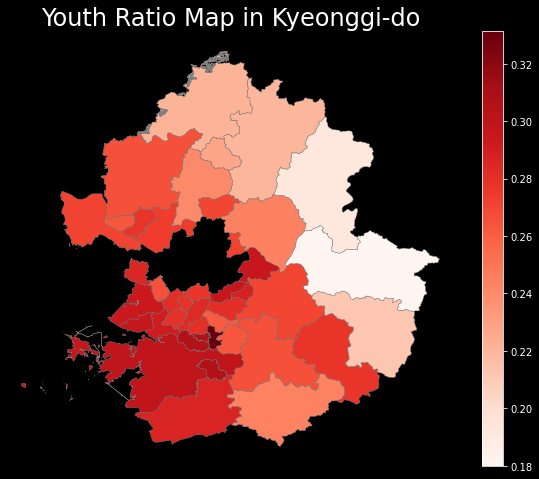

In [7]:
#전체 청년인구 비율 지도
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Youth Ratio Map in Kyeonggi-do",fontsize=24)
Merge_data.plot(ax=ax, column="청년비율", cmap="Reds",edgecolor="grey", linewidth=0.4, legend=True)
ax.axis("off")
plt.axis('equal')
plt.show()